In [1]:
# Dependencies
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

In [2]:
Gender_Income_Data = pd.read_csv("Datasets/Final_Cleaned")

In [3]:
Gender_Income_Data.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,1.0,2.0,6.0,NaN,4.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,2.0,13.0,1.0,NaN,0.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,1.0,2.0,3.0,NaN,3.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,2.0,29.0,6.0,5.0,5.00,NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,0.0
4,109267.0,1.0,2.0,21.0,2.0,4.0,5.00,NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.0


In [4]:
# Drop extra columns
#Gender_Income_Data = Gender_Income_Data.drop(columns=['Number of Rx Meds', 'Minutes of Moderate Work Daily','Age at Screening','Race','Educational Attainment'
#                                             ,'Minutes of Vigorous Work Daily','Minutes of Moderate Recreation Daily',])
#Gender_Income_Data

In [5]:
Gender_Income_Data.describe()
Gender_Income_Data.info()
print(Gender_Income_Data.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15560 entries, 0 to 15559
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Respondent ID                         15560 non-null  float64
 1   Number of Rx Meds                     6844 non-null   float64
 2   Gender                                15560 non-null  float64
 3   Age at Screening                      15560 non-null  float64
 4   Race                                  15560 non-null  float64
 5   Educational Attainment                9232 non-null   float64
 6   Family Income to Poverty Ratio        13359 non-null  float64
 7   Minutes of Vigorous Work Daily        2402 non-null   float64
 8   Minutes of Moderate Work Daily        4164 non-null   float64
 9   Minutes of Vigorous Recreation Daily  2417 non-null   float64
 10  Minutes of Moderate Recreation Daily  3893 non-null   float64
 11  Minutes of Sede

In [6]:
# Create an empty dictionary
Income_dic = {}

# Define the range of numbers
start = 1
end = 4.99

# Convert the end variable to an integer
end = int(end)

# Create the dictionary with keys as numbers in the range and values as 1
for num in range(start, end+1):
    Income_dic[num] = 1

Gender_Income_Data["Family Income to Poverty Ratio"] = pd.cut(Gender_Income_Data["Family Income to Poverty Ratio"],bins=[0,5,6],labels=["< $20,000", ">= $20,000"],right=False)
# Print the dictionary
Income_dic = {5:"≥ $20,000",1: "< $20,000", 2: '< $20,000', 3: '< $20,000', 4: '< $20,000'}



Gender_Income_Data.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,1.0,2.0,6.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,2.0,13.0,1.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,1.0,2.0,3.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,2.0,29.0,6.0,5.0,">= $20,000",NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,0.0
4,109267.0,1.0,2.0,21.0,2.0,4.0,">= $20,000",NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.0


In [7]:
#Gender Dictionary 
Gender_dic = {1.0 : "Male",2.0:"Female"}


Gender_Income_Data["Gender"] = Gender_Income_Data["Gender"].map(Gender_dic)
Gender_Income_Data.head()

,Respondent ID,Number of Rx Meds,Gender,Age at Screening,Race,Educational Attainment,Family Income to Poverty Ratio,Minutes of Vigorous Work Daily,Minutes of Moderate Work Daily,Minutes of Vigorous Recreation Daily,Minutes of Moderate Recreation Daily,Minutes of Sedentary Activity Daily,Sleep Hours Week/Workdays,Sleep Hours Weekends,Told Doctor About Sleep Issues,Feeling Tired During Day Frequency
0,109263.0,NaN,Male,2.0,6.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,109264.0,NaN,Female,13.0,1.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,109265.0,NaN,Male,2.0,3.0,NaN,"< $20,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,109266.0,NaN,Female,29.0,6.0,5.0,">= $20,000",NaN,NaN,60.0,30.0,480.0,7.5,8.0,2.0,0.0
4,109267.0,1.0,Female,21.0,2.0,4.0,">= $20,000",NaN,NaN,90.0,NaN,540.0,8.0,8.0,2.0,2.0


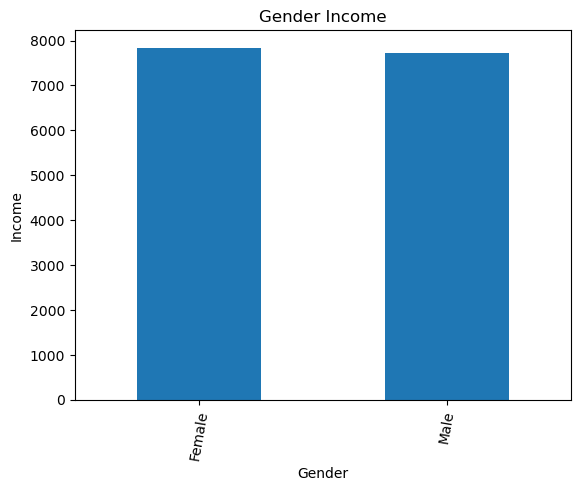

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


# Filter the DataFrame down only to those columns to chart
Gender_bar = Gender_Income_Data['Gender'].value_counts()

# Create a Pandas bar plot based off of the group series from before and label the title
# Use DataFrame.plot() in order to create a bar chart of the data
Gender_bar.plot(kind="bar")

# Set a title for the chart
plt.title("Gender Income")
plt.xlabel("Gender")
plt.xticks(rotation=80)
plt.ylabel("Income") 

plt.show()

In [13]:
# genincom  DataFrame  the column "Sleep Hours Week/Workdays"
mean_sleep_hoursWD = Gender_Income_Data["Sleep Hours Week/Workdays"].mean()
mean_sleep_hoursWE = Gender_Income_Data["Sleep Hours Weekends"].mean()

print("Mean Sleep Hours Week/Workdays:", mean_sleep_hoursWD)
print("Sleep Hours Weekends:", mean_sleep_hoursWE)

Mean Sleep Hours Week/Workdays: 7.6409203364670955
Sleep Hours Weekends: 8.361768491929894


In [14]:
# Calculate mean sleep hours by gender
mean_sleep_hours_male = Gender_Income_Data[Gender_Income_Data['Gender'] == 'Male']['Sleep Hours Week/Workdays'].mean()
mean_sleep_hours_female = Gender_Income_Data[Gender_Income_Data['Gender'] == 'Female']['Sleep Hours Week/Workdays'].mean()

# Print mean sleep hours by gender
print(f"Mean sleep hours for males: {mean_sleep_hours_male}")
print(f"Mean sleep hours for females: {mean_sleep_hours_female}")






Mean sleep hours for males: 7.530392356169953
Mean sleep hours for females: 7.74575780948708


In [15]:
import pandas as pd

# Create a dictionary with sleep hours data by gender
data = {
    "Gender": ["Male", "Female", "Male", "Female", "Male"],
    "SleepHours": [7, 8, 6, 7.5, 6.5]
}

# Create a DataFrame from the dictionary
genhoursbox = pd.DataFrame(data)

# Add separate columns for "Male" and "Female" sleep hours
genhoursbox["Male"] = genhoursbox.loc[genhoursbox["Gender"] == "Male", "SleepHours"]
genhoursbox["Female"] = genhoursbox.loc[genhoursbox["Gender"] == "Female", "SleepHours"]

# Display the updated DataFrame with separate columns for "Male" and "Female"
print(genhoursbox)

   Gender  SleepHours  Male  Female
0    Male         7.0   7.0     NaN
1  Female         8.0   NaN     8.0
2    Male         6.0   6.0     NaN
3  Female         7.5   NaN     7.5
4    Male         6.5   6.5     NaN


In [16]:
print(genhoursbox.columns)

Index(['Gender', 'SleepHours', 'Male', 'Female'], dtype='object')


In [17]:
# Assuming genhoursbox is a DataFrame containing sleep hours data by gender
# Calculate mean sleep hours by gender
mean_sleep_hours_male = genhoursbox["Male"].mean()
mean_sleep_hours_female = genhoursbox["Female"].mean()

# Print mean sleep hours by gender
print("Mean sleep hours for males:", mean_sleep_hours_male)
print("Mean sleep hours for females:", mean_sleep_hours_female)

#Make sure to define genhoursbox as a DataFrame before using it in calculations to avoid the NameError. If you have any more questions or need further assistance, feel free to ask!

Mean sleep hours for males: 6.5
Mean sleep hours for females: 7.75


Mean Sleep Hours for Males Weekdays: 6.5
Mean Sleep Hours for Females Weekdays: 7.75


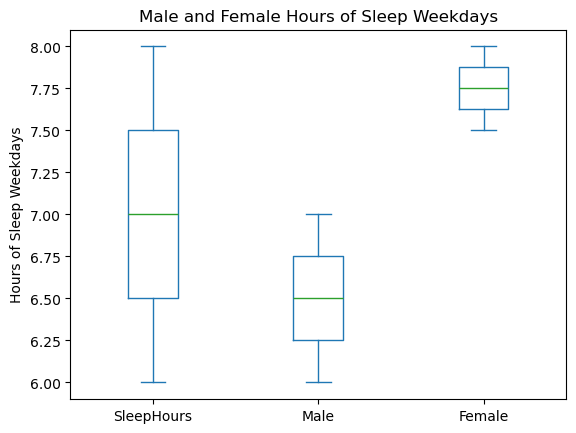

In [18]:
# Calculate mean sleep hours by gender
mean_sleep_hours_male = genhoursbox["Male"].mean()
mean_sleep_hours_female = genhoursbox["Female"].mean()

# Print mean sleep hours by gender
print("Mean Sleep Hours for Males Weekdays:", mean_sleep_hours_male)
print("Mean Sleep Hours for Females Weekdays:", mean_sleep_hours_female)

# Create the box plot
ax = genhoursbox.plot.box()

# Set the label for the y-axis
ax.set_ylabel("Hours of Sleep Weekdays")

# Set the title for the plot
ax.set_title("Male and Female Hours of Sleep Weekdays")

# Show the plot
plt.show()

In [19]:
# Calculate mean sleep hours for weekends by gender
mean_sleep_hours_male_weekends = genhoursbox["Male"].mean()
mean_sleep_hours_female_weekends = genhoursbox["Female"].mean()

# Print mean sleep hours for weekends by gender
print("Mean Sleep Hours for Males Weekends:", mean_sleep_hours_male_weekends)
print("Mean Sleep Hours for Females Weekends:", mean_sleep_hours_female_weekends)

Mean Sleep Hours for Males Weekends: 6.5
Mean Sleep Hours for Females Weekends: 7.75


Mean Sleep Hours for Males Weekends: 6.5
Mean Sleep Hours for Females Weekends: 7.75


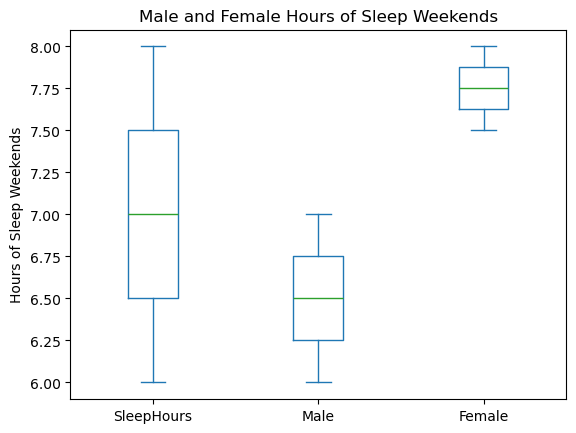

In [20]:
# Calculate mean sleep hours for weekends by gender
mean_sleep_hours_male_weekends = genhoursbox["Male"].mean()
mean_sleep_hours_female_weekends = genhoursbox["Female"].mean()

# Print mean sleep hours for weekends by gender
print("Mean Sleep Hours for Males Weekends:", mean_sleep_hours_male_weekends)
print("Mean Sleep Hours for Females Weekends:", mean_sleep_hours_female_weekends)

# Create the box plot
ax = genhoursbox.plot.box()

# Set the label for the y-axis
ax.set_ylabel("Hours of Sleep Weekends")

# Set the title for the plot
ax.set_title("Male and Female Hours of Sleep Weekends")

# Show the plot
plt.show()

In [21]:
import pandas as pd

# Assuming gender_data is your DataFrame containing gender information
# Create a sample DataFrame for illustration purposes
data = {
    "Gender": ["Male", "Female", "Male", "Female", "Male"],
    "Age": [30, 25, 35, 28, 40]
}
gender_data = pd.DataFrame(data)

# Filter the DataFrame to get data for males
male_data = gender_data[gender_data['Gender'] == 'Male']

# Display the filtered data for males
print(male_data)

  Gender  Age
0   Male   30
2   Male   35
4   Male   40


In [22]:
male_data = gender_data[gender_data['Gender'] == 'Male']
male_data

,Gender,Age
0,Male,30
2,Male,35
4,Male,40


In [23]:
male_data = gender_data[gender_data['Gender'] == 'Male']
male_data
female_data = gender_data[gender_data['Gender'] == 'Female']
female_data

,Gender,Age
1,Female,25
3,Female,28


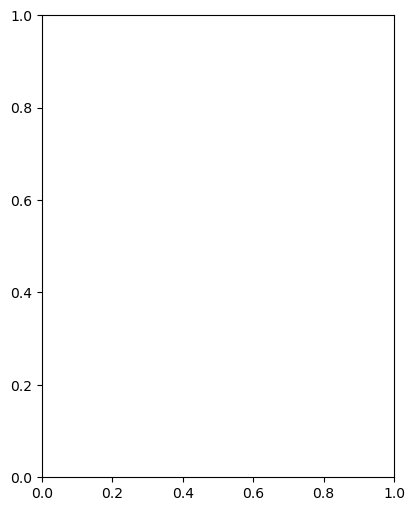

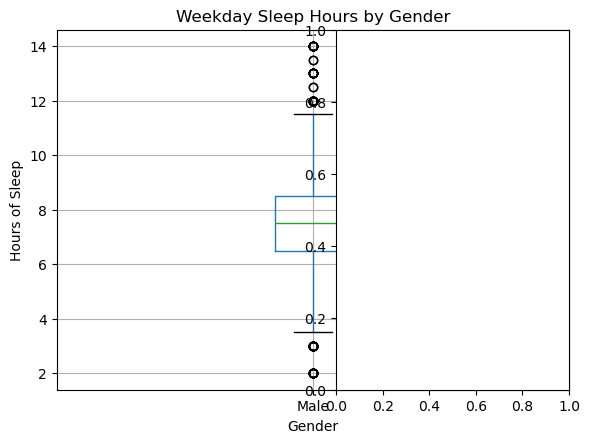

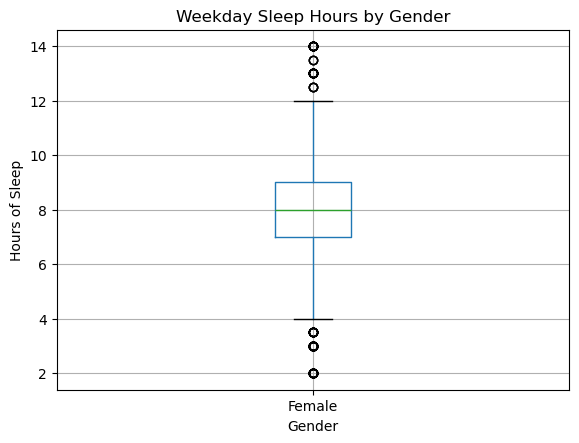

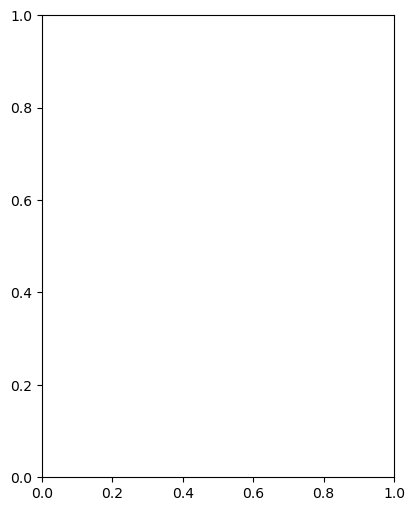

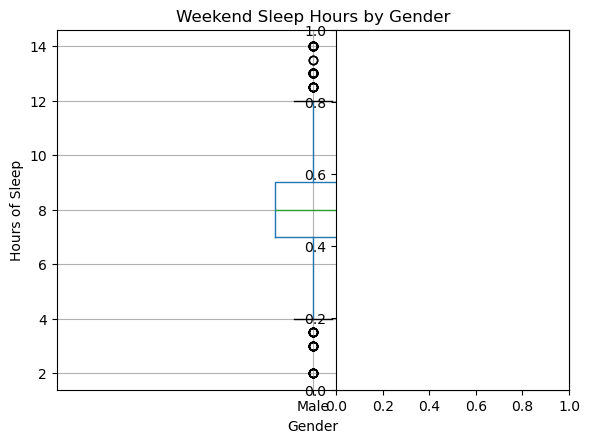

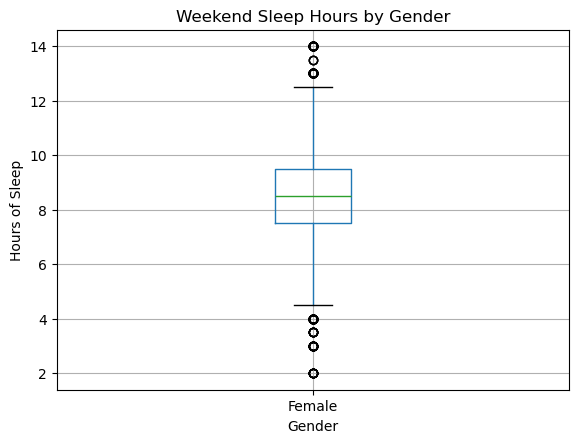

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Gender_Income_Data' is your DataFrame with the data
# Filter the DataFrame for gender and sleep hours on weekdays and weekends
gender_data = Gender_Income_Data[['Gender', 'Sleep Hours Week/Workdays', 'Sleep Hours Weekends']]

# Separate the data by gender
male_data = gender_data[gender_data['Gender'] == 'Male']
female_data = gender_data[gender_data['Gender'] == 'Female']

# Create box plots for weekday sleep hours by gender
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
male_data.boxplot(column='Sleep Hours Week/Workdays', by='Gender')
plt.title('Weekday Sleep Hours by Gender')
plt.ylabel('Hours of Sleep')
plt.suptitle('')

plt.subplot(1, 2, 2)
female_data.boxplot(column='Sleep Hours Week/Workdays', by='Gender')
plt.title('Weekday Sleep Hours by Gender')
plt.ylabel('Hours of Sleep')
plt.suptitle('')

plt.show()

# Create box plots for weekend sleep hours by gender
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
male_data.boxplot(column='Sleep Hours Weekends', by='Gender')
plt.title('Weekend Sleep Hours by Gender')
plt.ylabel('Hours of Sleep')
plt.suptitle('')

plt.subplot(1, 2, 2)
female_data.boxplot(column='Sleep Hours Weekends', by='Gender')
plt.title('Weekend Sleep Hours by Gender')
plt.ylabel('Hours of Sleep')
plt.suptitle('')

plt.show()

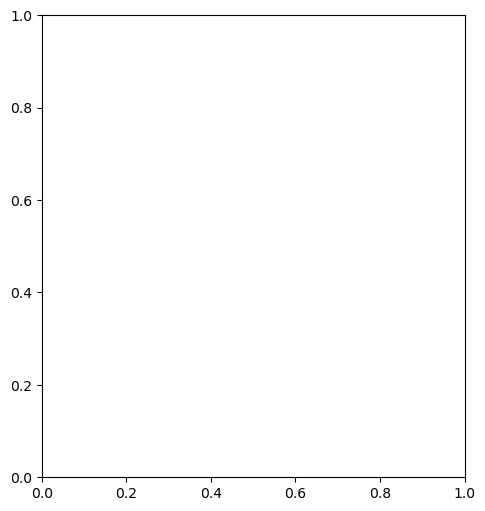

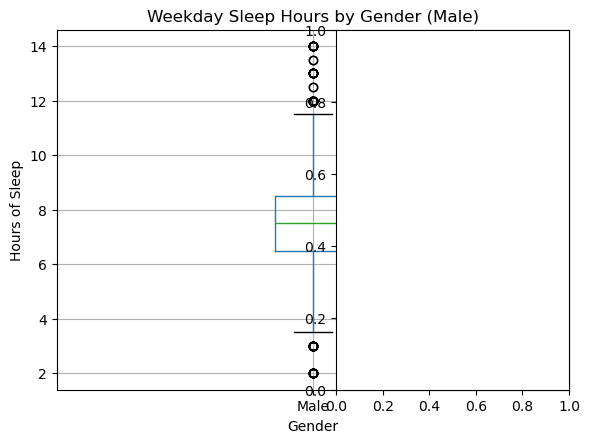

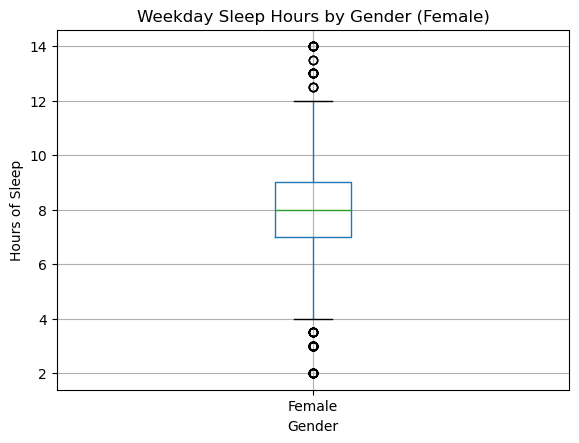

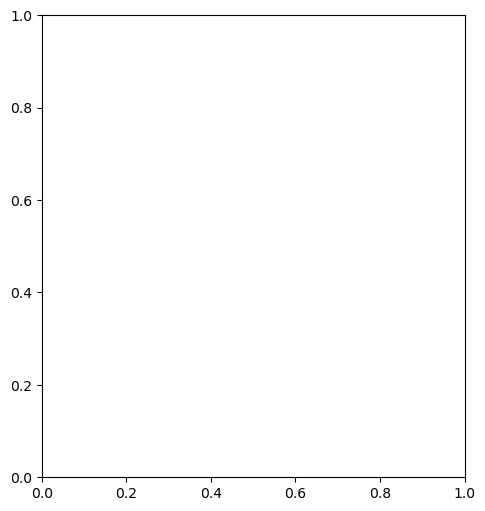

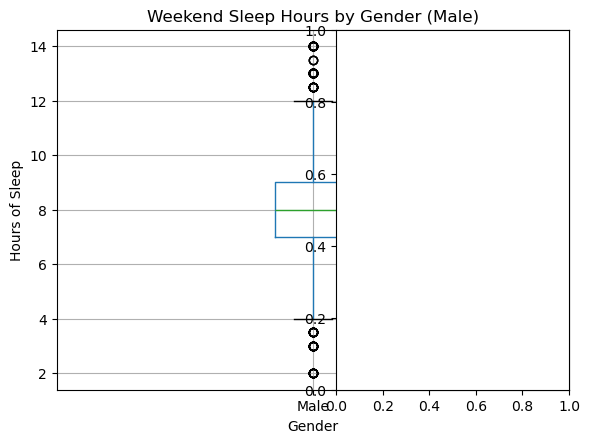

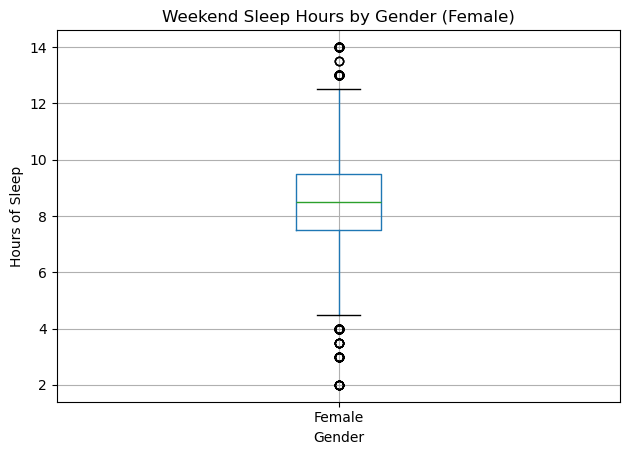

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Gender_Income_Data' is your DataFrame with the data
# Filter the DataFrame for gender and sleep hours on weekdays and weekends
gender_data = Gender_Income_Data[['Gender', 'Sleep Hours Week/Workdays', 'Sleep Hours Weekends']]

# Separate the data by gender
male_data = gender_data[gender_data['Gender'] == 'Male']
female_data = gender_data[gender_data['Gender'] == 'Female']

# Create a single figure for both weekday and weekend sleep hours by gender
plt.figure(figsize=(12, 6))

# Create subplots for weekday sleep hours by gender
plt.subplot(1, 2, 1)
male_data.boxplot(column='Sleep Hours Week/Workdays', by='Gender')
plt.title('Weekday Sleep Hours by Gender (Male)')
plt.ylabel('Hours of Sleep')
plt.suptitle('')

plt.subplot(1, 2, 2)
female_data.boxplot(column='Sleep Hours Week/Workdays', by='Gender')
plt.title('Weekday Sleep Hours by Gender (Female)')
plt.ylabel('Hours of Sleep')
plt.suptitle('')

# Create subplots for weekend sleep hours by gender
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
male_data.boxplot(column='Sleep Hours Weekends', by='Gender')
plt.title('Weekend Sleep Hours by Gender (Male)')
plt.ylabel('Hours of Sleep')
plt.suptitle('')

plt.subplot(1, 2, 2)
female_data.boxplot(column='Sleep Hours Weekends', by='Gender')
plt.title('Weekend Sleep Hours by Gender (Female)')
plt.ylabel('Hours of Sleep')
plt.suptitle('')

plt.tight_layout()
plt.show()


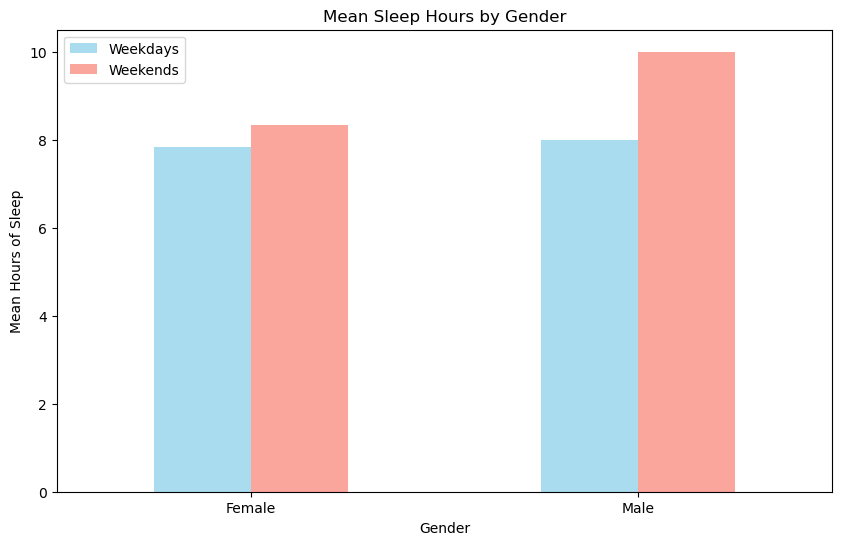

In [27]:
#Here's how you can create a single bar chart for the mean sleep hours by gender using the provided data:


import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrames for females and males
female_data = pd.DataFrame({
    'Gender': ['Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female'],
    'Sleep Hours Week/Workdays': [None, 7.5, 8.0, 8.5, None, None, 8.0, 7.0, 8.0],
    'Sleep Hours Weekends': [None, 8.0, 8.0, 8.0, None, None, 8.0, 8.0, 10.0]
})

male_data = pd.DataFrame({
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male'],
    'Sleep Hours Week/Workdays': [None, None, None, 10.0, None, None, None, 6.0, None],
    'Sleep Hours Weekends': [None, None, None, 13.0, None, None, None, 7.0, None]
})

# Combine the data for males and females
combined_data = pd.concat([female_data, male_data])

# Calculate the mean sleep hours for weekdays and weekends by gender
mean_sleep_hours = combined_data.groupby('Gender').mean()

# Create a bar chart for mean sleep hours by gender
mean_sleep_hours.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], alpha=0.7)
plt.title('Mean Sleep Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Hours of Sleep')
plt.xticks(rotation=0)
plt.legend(['Weekdays', 'Weekends'])
plt.show()


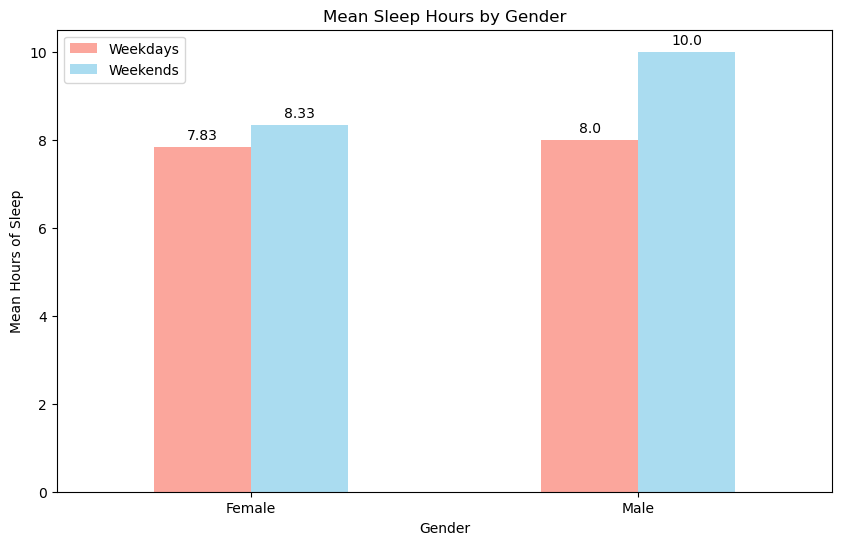

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrames for females and males
female_data = pd.DataFrame({
    'Gender': ['Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female'],
    'Sleep Hours Week/Workdays': [None, 7.5, 8.0, 8.5, None, None, 8.0, 7.0, 8.0],
    'Sleep Hours Weekends': [None, 8.0, 8.0, 8.0, None, None, 8.0, 8.0, 10.0]
})

male_data = pd.DataFrame({
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male', 'Male'],
    'Sleep Hours Week/Workdays': [None, None, None, 10.0, None, None, None, 6.0, None],
    'Sleep Hours Weekends': [None, None, None, 13.0, None, None, None, 7.0, None]
})

# Combine the data for males and females
combined_data = pd.concat([female_data, male_data])

# Calculate the mean sleep hours for weekdays and weekends by gender
mean_sleep_hours = combined_data.groupby('Gender').mean()

# Create a bar chart for mean sleep hours by gender
ax = mean_sleep_hours.plot(kind='bar', figsize=(10, 6), color=['salmon', 'skyblue'], alpha=0.7)
plt.title('Mean Sleep Hours by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Hours of Sleep')
plt.xticks(rotation=0)
plt.legend(['Weekdays', 'Weekends'])

# Annotate the bars with the mean values
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.1, str(round(i.get_height(), 2)), ha='center', va='bottom')

# Save the plot as a PNG file
plt.savefig('mean_sleep_hours_by_gender.png')

plt.show()

In [2]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named Gender_Income_Data
#plt.figure(figsize=(10, 6))
#plt.scatter(Gender_Income_Data['Family Income to Poverty Ratio'], Gender_Income_Data['Minutes of Vigorous Work Daily'])
#plt.xlabel('Family Income to Poverty Ratio')
#plt.ylabel('Minutes of Vigorous Work Daily')
#plt.title('Family Income to Poverty Ratio vs. Minutes of Vigorous Work Daily')
#plt.show()

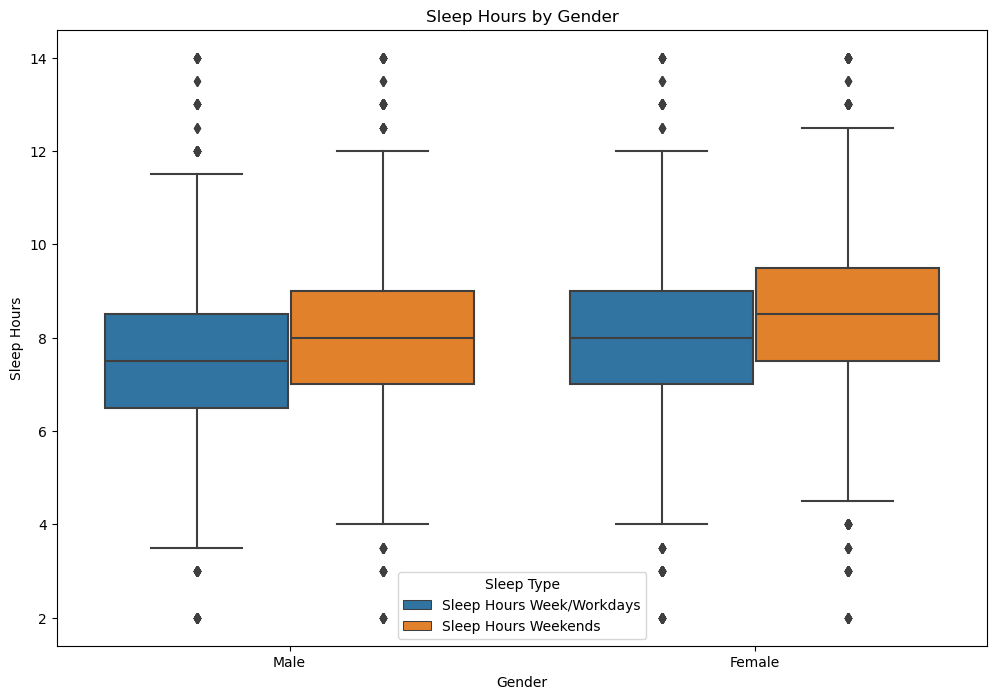

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named Gender_Income_Data
plt.figure(figsize=(12, 8))

# Combine the sleep hours data for workdays and weekends for both genders
sleep_data = pd.melt(Gender_Income_Data, id_vars='Gender', value_vars=['Sleep Hours Week/Workdays', 'Sleep Hours Weekends'], 
                     var_name='Sleep Type', value_name='Sleep Hours')

# Create a box plot to visualize sleep quality
sns.boxplot(x='Gender', y='Sleep Hours', hue='Sleep Type', data=sleep_data)
plt.xlabel('Gender')
plt.ylabel('Sleep Hours')
plt.title('Sleep Hours by Gender')
plt.legend(title='Sleep Type')

plt.savefig('Gender_sleep_stats_Box.png')

plt.show()





In [31]:
# Assuming your DataFrame is named Gender_Income_Data
import numpy as np

# Calculate statistics for sleep hours by gender and day
sleep_stats = Gender_Income_Data.groupby('Gender').agg({'Sleep Hours Week/Workdays': ['mean', 'median', 'std', lambda x: x.max() - x.min(), lambda x: np.percentile(x, 75) - np.percentile(x, 25)],
                                        'Sleep Hours Weekends': ['mean', 'median', 'std', lambda x: x.max() - x.min(), lambda x: np.percentile(x, 75) - np.percentile(x, 25) ]})

# Rename the columns for better interpretation
sleep_stats.columns = ['Workdays Mean', 'Workdays Median', 'Workdays Std', 'Workdays Range', 'Workdays IQR',
                       'Weekends Mean', 'Weekends Median', 'Weekends Std', 'Weekends Range', 'Weekends IQR']

# Display the calculated statistics
print(sleep_stats)


        Workdays Mean  Workdays Median  Workdays Std  Workdays Range  \
Gender                                                                 
Female       7.745758              8.0      1.706109            12.0   
Male         7.530392              7.5      1.650490            12.0   

        Workdays IQR  Weekends Mean  Weekends Median  Weekends Std  \
Gender                                                               
Female           NaN       8.511863              8.5      1.814843   
Male             NaN       8.203459              8.0      1.820610   

        Weekends Range  Weekends IQR  
Gender                                
Female            12.0           NaN  
Male              12.0           NaN  


In [32]:
sleep_stats.head()


,Workdays Mean,Workdays Median,Workdays Std,Workdays Range,Workdays IQR,Weekends Mean,Weekends Median,Weekends Std,Weekends Range,Weekends IQR
Gender,,,,,,,,,,
Female,7.745758,8.0,1.706109,12.0,NaN,8.511863,8.5,1.814843,12.0,NaN
Male,7.530392,7.5,1.650490,12.0,NaN,8.203459,8.0,1.820610,12.0,NaN


<Figure size 1200x800 with 0 Axes>

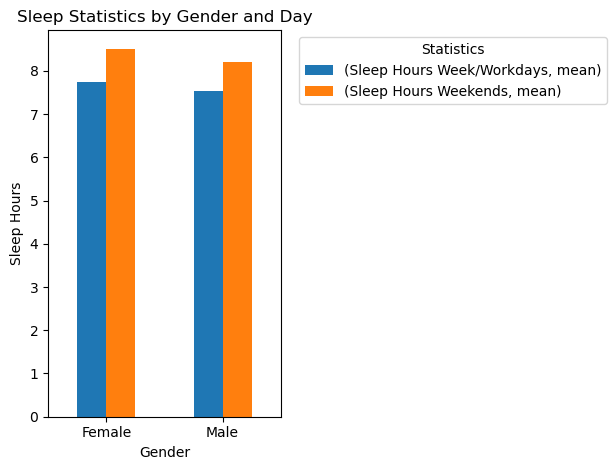

In [35]:
import matplotlib.pyplot as plt

# Create a bar plot of the sleep statistics for the first few rows
plt.figure(figsize=(12, 8))
sleep_statsMMR.head().plot(kind='bar')
plt.title('Sleep Statistics by Gender and Day')
plt.xlabel('Gender')
plt.ylabel('Sleep Hours')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Move the legend to a specific location
plt.legend(title='Statistics', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot as a PNG file
plt.savefig('Gender_sleep_stats_barplot.png')
plt.show()





<Figure size 1200x2000 with 0 Axes>

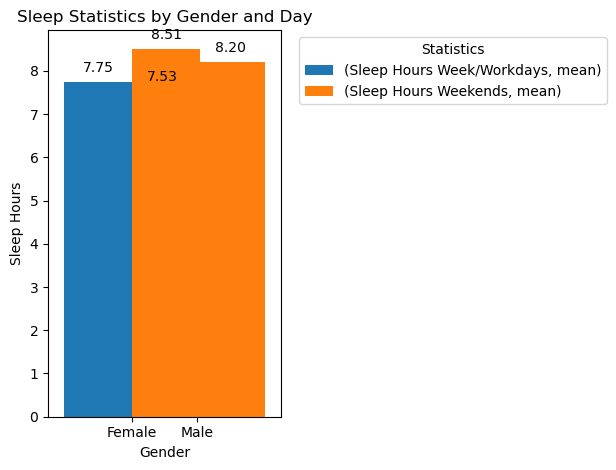

In [36]:
import matplotlib.pyplot as plt

# Create a bar plot of the sleep statistics for the first few rows
plt.figure(figsize=(12, 20))
bar_plot = sleep_statsMMR.head().plot(kind='bar', width=2.1)  # Adjust the width of the bars
plt.title('Sleep Statistics by Gender and Day')
plt.xlabel('Gender')
plt.ylabel('Sleep Hours')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Move the legend to a specific location
plt.legend(title='Statistics', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show rounded values on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()  # Adjust layout to prevent clipping of labels

# Save the plot as a PNG file
plt.savefig('Gender_sleep_stats_barplot.png')
plt.show()


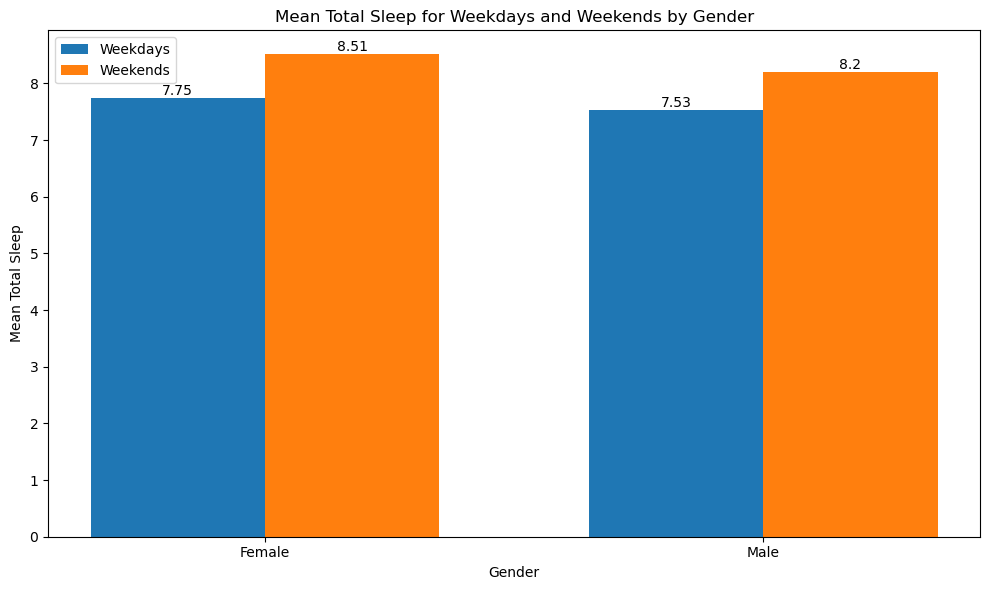

In [38]:
import matplotlib.pyplot as plt

# Calculate the mean total sleep for weekdays and weekends by gender
weekday_mean_female = 7.745758
weekend_mean_female = 8.511863
weekday_mean_male = 7.530392
weekend_mean_male = 8.203459

# Create a bar plot
plt.figure(figsize=(10, 6))

# Define the data for the plot
genders = ['Female', 'Male']
weekday_means = [weekday_mean_female, weekday_mean_male]
weekend_means = [weekend_mean_female, weekend_mean_male]

bar_width = 0.35
index = range(len(genders))

# Plot the bar chart
bar1 = plt.bar(index, weekday_means, bar_width, label='Weekdays')
bar2 = plt.bar([i + bar_width for i in index], weekend_means, bar_width, label='Weekends')

# Add labels, title, and legend
plt.xlabel('Gender')
plt.ylabel('Mean Total Sleep')
plt.title('Mean Total Sleep for Weekdays and Weekends by Gender')
plt.xticks([i + bar_width/2 for i in index], genders)
plt.legend()

# Add values on top of the bars
for bar in bar1 + bar2:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), round(bar.get_height(), 2), ha='center', va='bottom')

plt.savefig('Gender_sleep_stats_barplot2.png')

# Show the plot
plt.tight_layout()
plt.show()

In [39]:
from scipy import stats

# Filter the data for Male and Female separately
male_data = Gender_Income_Data[Gender_Income_Data['Gender'] == 'Male']['Sleep Hours Week/Workdays']
female_data = Gender_Income_Data[Gender_Income_Data['Gender'] == 'Female']['Sleep Hours Week/Workdays']

# Perform a t-test to compare the means of sleep hours for males and females on weekdays
t_stat, p_value = stats.ttest_ind(male_data, female_data, equal_var=False)

print(f"P-value for the difference in sleep hours between males and females on weekdays: {p_value}")


P-value for the difference in sleep hours between males and females on weekdays: nan
